In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
train_in = pd.read_csv('data/train_input.csv', sep=';')
train_out = pd.read_csv('data/train_output.csv', sep=';')
#test_in = pd.read_csv('data/test_input.csv', sep=';')

In [161]:
train_in.head()

,ID,DEVICE,EEG_0,EEG_1,EEG_2,EEG_3,EEG_4,EEG_5,EEG_6,EEG_7,...,EEG_74991,EEG_74992,EEG_74993,EEG_74994,EEG_74995,EEG_74996,EEG_74997,EEG_74998,EEG_74999,HYPNOGRAM
0,0,0.0,18.513157,17.887674,17.442404,16.944677,16.080168,15.002975,13.949936,13.029482,...,-10.850019,-11.230370,-11.445168,-11.626509,-11.631254,-11.295610,-10.671482,-9.810492,-9.003139,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."
1,1,0.0,3.377115,3.720635,4.122524,4.086743,3.476264,2.501397,1.601755,0.721100,...,-9.435968,-7.700051,-5.312872,-2.887947,-1.066923,0.143711,1.566658,3.194142,4.335758,"['0', '0', '0', '0', '0', '0', '2', '0', '0', ..."
2,2,0.0,20.753752,33.122223,41.263256,44.764065,45.441994,44.729267,42.983265,40.561638,...,2.661809,0.194748,-1.819428,-3.309473,-4.242142,-4.506508,-4.677623,-4.937207,-4.994258,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."
3,3,0.0,14.535362,14.571295,14.288245,13.808476,13.219709,12.498644,11.697461,10.954629,...,3.958761,3.678608,3.307606,3.170362,3.239853,3.253531,3.081603,2.759164,2.302796,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."
4,4,1.0,0.000006,0.000006,0.000006,0.000009,0.000008,0.000011,0.000009,0.000010,...,0.000036,0.000032,0.000027,0.000025,0.000022,0.000021,0.000019,0.000019,0.000022,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ..."


In [6]:
train_id = train_in['ID']
# test_id = test_in['ID']
train_device = train_in['DEVICE']
# test_device = test_in['DEVICE']
train_hypno = train_in['HYPNOGRAM']
# test_hypno = test_in['HYPNOGRAM']

train_records = train_in.iloc[:,2:-1].transpose()
# test_records = test_in.iloc[:,2:-1].transpose()

Exploratory data analysis on train records

In [7]:
train_records.describe()

,0,1,2,3,4,5,6,7,8,9,...,571,572,573,574,575,576,577,578,579,580
count,75000.000000,75000.000000,75000.000000,75000.000000,7.500000e+04,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,...,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,0.001396,-0.000647,0.010420,-0.007526,-5.648294e-08,0.030010,-0.007884,-0.017715,-0.031207,-0.028034,...,-0.005785,-0.007462,0.041959,0.005790,0.129916,0.013924,-0.022282,-0.011219,-0.008861,0.162175
std,26.811528,11.881991,97.740946,17.135398,3.429267e-05,14.686044,14.160303,22.650047,14.843249,20.734457,...,13.548357,10.892392,13.219287,24.565145,46.222208,12.128443,13.146455,18.121433,25.312329,110.389812
min,-584.737732,-66.786278,-2119.885986,-190.482651,-1.853874e-04,-73.045670,-70.755417,-373.871277,-91.430809,-228.086319,...,-61.011181,-44.082382,-52.269302,-92.455818,-174.524368,-60.258286,-115.757523,-311.747955,-129.139267,-2892.114258
25%,-7.404769,-7.863815,-10.820185,-7.498345,-1.945274e-05,-8.687715,-9.322938,-8.073515,-7.592901,-10.994715,...,-8.780881,-7.338382,-8.660807,-15.166142,-22.242812,-7.498304,-7.452869,-7.119892,-15.766760,-6.974056
50%,0.581291,0.119838,-0.063237,0.449428,7.538832e-07,0.274879,0.009401,0.203786,0.600074,0.763060,...,-0.024483,-0.082415,-0.705542,0.965441,0.413926,0.377597,0.251785,0.173024,0.033963,0.124361
75%,7.785728,7.791786,11.155289,8.146739,2.020791e-05,9.325141,9.050028,8.848416,8.369638,11.935645,...,8.876539,7.253509,7.984434,16.338647,22.075676,7.964684,7.904012,7.539127,16.153967,6.794692
max,370.873413,58.905529,1944.065430,440.595032,1.237710e-04,63.762737,64.697296,395.936920,114.786797,191.613953,...,62.684914,45.022598,52.220604,78.558868,1389.816650,46.888836,71.272049,182.260498,120.926888,1121.835327


In [8]:
fulldf = pd.merge(train_in, train_out, on='ID')

In [9]:
train_out

,ID,TARGET
0,0,32
1,1,29
2,2,36
3,3,56
4,4,60
5,5,39
6,6,36
7,7,37
8,8,58
9,9,40


In [10]:
fulldf

,ID,DEVICE,EEG_0,EEG_1,EEG_2,EEG_3,EEG_4,EEG_5,EEG_6,EEG_7,...,EEG_74992,EEG_74993,EEG_74994,EEG_74995,EEG_74996,EEG_74997,EEG_74998,EEG_74999,HYPNOGRAM,TARGET
0,0,0.0,18.513157,17.887674,17.442404,16.944677,16.080168,15.002975,13.949936,13.029482,...,-11.230370,-11.445168,-11.626509,-11.631254,-11.295610,-10.671482,-9.810492,-9.003139,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",32
1,1,0.0,3.377115,3.720635,4.122524,4.086743,3.476264,2.501397,1.601755,0.721100,...,-7.700051,-5.312872,-2.887947,-1.066923,0.143711,1.566658,3.194142,4.335758,"['0', '0', '0', '0', '0', '0', '2', '0', '0', ...",29
2,2,0.0,20.753752,33.122223,41.263256,44.764065,45.441994,44.729267,42.983265,40.561638,...,0.194748,-1.819428,-3.309473,-4.242142,-4.506508,-4.677623,-4.937207,-4.994258,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",36
3,3,0.0,14.535362,14.571295,14.288245,13.808476,13.219709,12.498644,11.697461,10.954629,...,3.678608,3.307606,3.170362,3.239853,3.253531,3.081603,2.759164,2.302796,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",56
4,4,1.0,0.000006,0.000006,0.000006,0.000009,0.000008,0.000011,0.000009,0.000010,...,0.000032,0.000027,0.000025,0.000022,0.000021,0.000019,0.000019,0.000022,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",60
5,5,0.0,2.157661,0.553162,-1.216814,-3.066420,-4.871763,-6.431633,-7.552323,-8.112910,...,25.711145,24.377981,23.501120,22.964960,22.642601,22.380957,22.008242,21.509195,"['0', '0', '0', '0', '0', '0', '1', '0', '1', ...",39
6,6,0.0,-22.688078,-20.044596,-18.404722,-17.891281,-17.701622,-17.365948,-16.553183,-14.829457,...,3.275542,3.680151,3.597312,2.975679,2.409734,2.445321,2.437376,2.021164,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",36
7,7,0.0,8.684734,7.225457,6.008805,5.098927,4.470098,4.015224,3.712195,3.736494,...,5.003548,3.850974,2.595649,1.751041,1.560075,1.707247,1.852457,1.918286,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",37
8,8,0.0,-13.450840,-12.854297,-12.293760,-11.689228,-11.025227,-10.463305,-10.184059,-10.152052,...,4.806968,5.100900,5.459562,5.899413,6.258317,6.391021,6.245914,5.818482,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",58
9,9,0.0,2.217397,4.484025,6.651739,8.349331,9.585050,10.654525,11.748752,12.789876,...,-40.908005,-39.731171,-38.428715,-36.836124,-34.850094,-32.429379,-29.734104,-27.193937,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",40


In [11]:
fulldf['HYPNOGRAM']

0      ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...
1      ['0', '0', '0', '0', '0', '0', '2', '0', '0', ...
2      ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...
3      ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...
4      ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...
5      ['0', '0', '0', '0', '0', '0', '1', '0', '1', ...
6      ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...
7      ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...
8      ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...
9      ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...
10     ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...
11     ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...
12     ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...
13     ['0', '0', '0', '-1', '-1', '0', '0', '-1', '-...
14     ['0', '0', '0', '0', '0', '0', '1', '0', '0', ...
15     ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...
16     ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...
17     ['0', '0', '0', '0', '0'

In [95]:
device1 = fulldf[fulldf.DEVICE==1.0]
device1_to = train_out[fulldf.DEVICE==1.0]

In [13]:
EEG = device1[device1.columns[2:-2]]

In [14]:
viz = EEG.as_matrix()
y = viz[2,:]

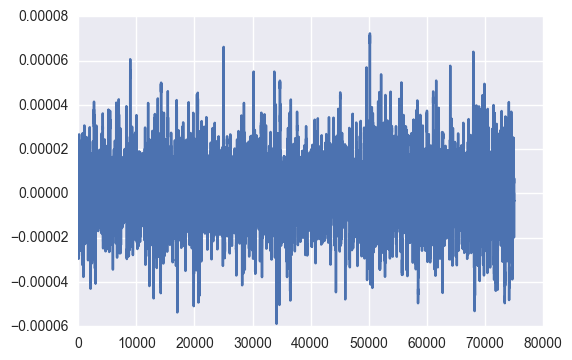

In [15]:
plt.plot(y)
plt.show()

In [16]:
from __future__ import division
from scipy.signal import butter, lfilter
import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample, ArmaProcess

fs = 1E9 # 1 ns -> 1 GHz
cutoff = 2.5E5# 10 MHz
B, A = butter(5, cutoff / (fs / 2), btype='low') # 1st order Butterworth low-pass
filtered_signal = lfilter(B, A, y, axis=0)

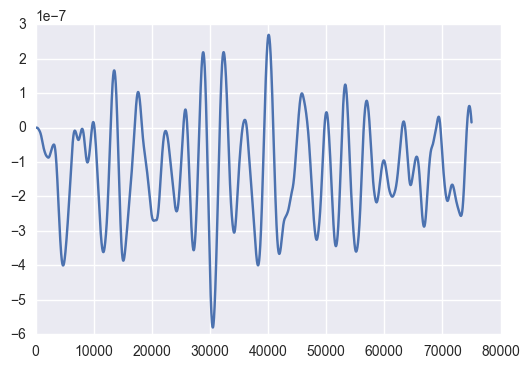

In [17]:
plt.plot(filtered_signal)
plt.show()

0.00281057117262


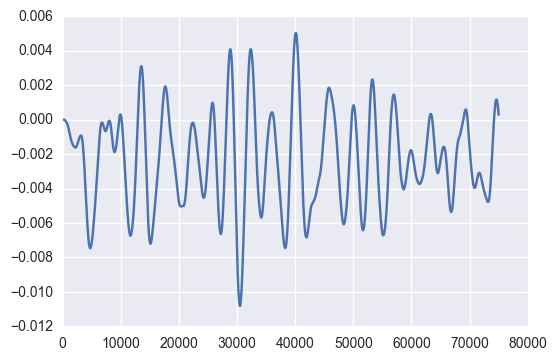

In [18]:
from sklearn import preprocessing
filtered_signal = filtered_signal.reshape(1, -1);
nf_s = preprocessing.normalize(filtered_signal, norm='l2', axis=1, copy=True, return_norm=False).T

plt.plot(nf_s)

print(np.std(nf_s))

In [19]:
from statsmodels import tsa

In [23]:
#arma = tsa.arima_model.ARIMA(nf_s, (9, 2, 2))
#results = arma.fit(transparams=False)

In [24]:
import scipy

data = np.reshape(nf_s, (-1, ))

def stft(x, fftsize=1024, overlap=256):   
    hop = fftsize / overlap
    w = scipy.hanning(fftsize+1)[:-1]      # better reconstruction with this trick +1)[:-1]  
    return np.array([np.fft.rfft(w*x[i:i+fftsize]) for i in range(0, len(x)-fftsize, hop)])

In [25]:
import pywt

pywt.dwt?

In [26]:
cA, cD = pywt.dwt(data, 'haar')

<Container object of 3 artists>

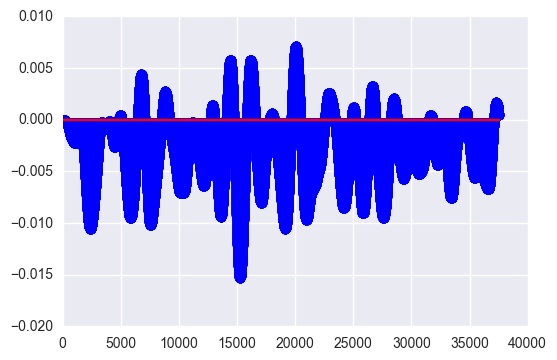

In [27]:
plt.stem(cA)

<Container object of 3 artists>

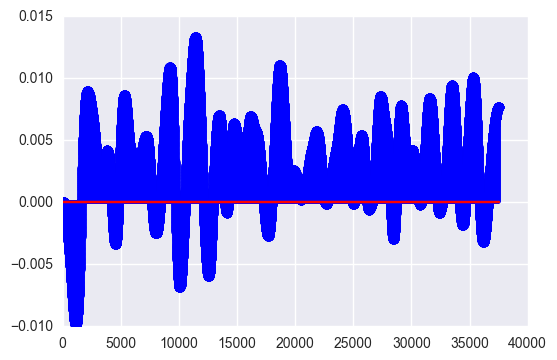

In [28]:
y = viz[3,:]
filtered_signal = lfilter(B, A, y, axis=0)
filtered_signal = filtered_signal.reshape(1, -1);
nf_s = preprocessing.normalize(filtered_signal, norm='l2', axis=1, copy=True, return_norm=False).T
data = np.reshape(nf_s, (-1, ))
cA, cD = pywt.dwt(data, 'haar')
plt.stem(cA)

In [29]:
viz29 = viz[train_out.TARGET == 29]

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  if __name__ == '__main__':


<Container object of 3 artists>

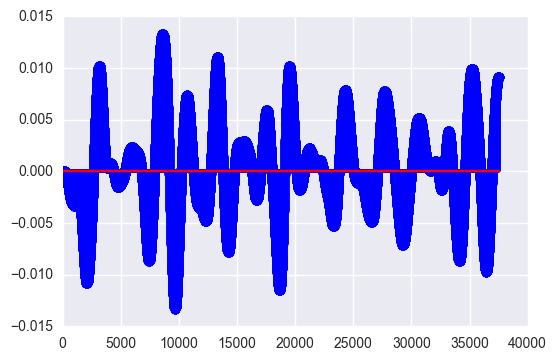

In [30]:
y = viz29[1,:]
filtered_signal = lfilter(B, A, y, axis=0)
filtered_signal = filtered_signal.reshape(1, -1);
nf_s = preprocessing.normalize(filtered_signal, norm='l2', axis=1, copy=True, return_norm=False).T
data = np.reshape(nf_s, (-1, ))
cA, cD = pywt.dwt(data, 'haar')
plt.stem(cA)

<Container object of 3 artists>

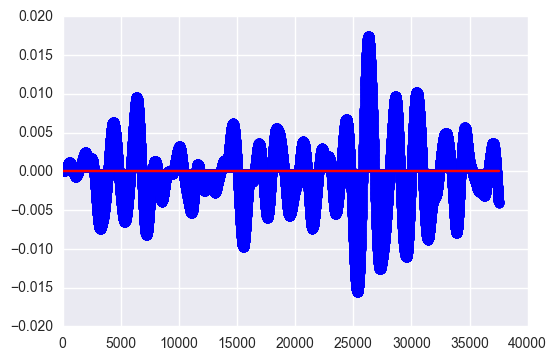

In [31]:
y = viz29[2,:]
filtered_signal = lfilter(B, A, y, axis=0)
filtered_signal = filtered_signal.reshape(1, -1);
nf_s = preprocessing.normalize(filtered_signal, norm='l2', axis=1, copy=True, return_norm=False).T
data = np.reshape(nf_s, (-1, ))
cA, cD = pywt.dwt(data, 'haar')
plt.stem(cA)

In [32]:
viz35 = viz[train_out.TARGET == 35]

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  if __name__ == '__main__':


<Container object of 3 artists>

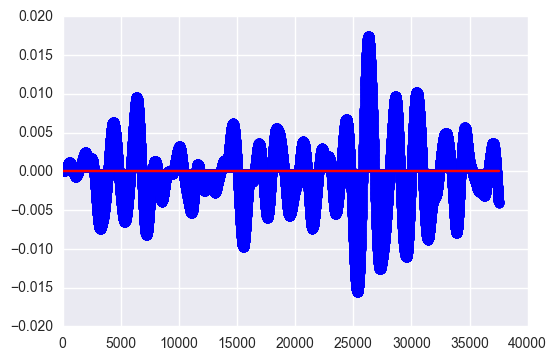

In [33]:
y = viz35[1,:]
filtered_signal = lfilter(B, A, y, axis=0)
filtered_signal = filtered_signal.reshape(1, -1);
nf_s = preprocessing.normalize(filtered_signal, norm='l2', axis=1, copy=True, return_norm=False).T
data = np.reshape(nf_s, (-1, ))
cA, cD = pywt.dwt(data, 'haar')
plt.stem(cA)

<Container object of 3 artists>

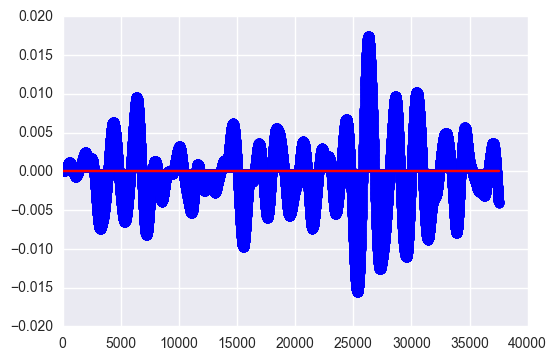

In [34]:
y = viz35[2,:]
filtered_signal = lfilter(B, A, y, axis=0)
filtered_signal = filtered_signal.reshape(1, -1);
nf_s = preprocessing.normalize(filtered_signal, norm='l2', axis=1, copy=True, return_norm=False).T
data = np.reshape(nf_s, (-1, ))
cA, cD = pywt.dwt(data, 'haar')
plt.stem(cA)

In [35]:
from scipy.stats.stats import pearsonr

In [66]:
y = viz35[1,:]
filtered_signal = lfilter(B, A, y, axis=0)
filtered_signal = filtered_signal.reshape(1, -1);
nf_s_1 = preprocessing.normalize(filtered_signal, norm='l2', axis=1, copy=True, return_norm=False)
nf_s_1 = nf_s_1[0]

In [67]:
y = viz29[9,:]
filtered_signal = lfilter(B, A, y, axis=0)
filtered_signal = filtered_signal.reshape(1, -1);
nf_s = preprocessing.normalize(filtered_signal, norm='l2', axis=1, copy=True, return_norm=False)
nf_s = nf_s[0]

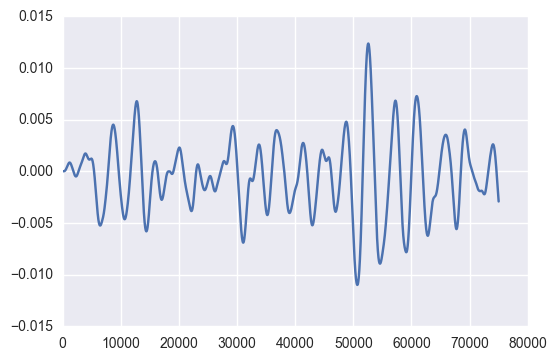

In [68]:
plt.plot(nf_s)

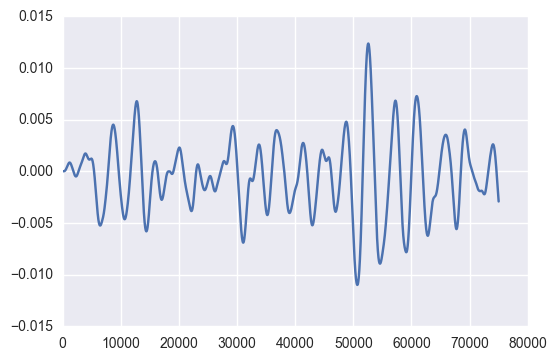

In [69]:
plt.plot(nf_s_1)

In [77]:
viz35

array([[  6.12436628e-06,   5.68500012e-06,   5.67608510e-06, ...,
          1.93146611e-05,   1.87638078e-05,   2.18372818e-05],
       [  6.12436628e-06,   5.68500012e-06,   5.67608510e-06, ...,
          1.93146611e-05,   1.87638078e-05,   2.18372818e-05],
       [  6.12436628e-06,   5.68500012e-06,   5.67608510e-06, ...,
          1.93146611e-05,   1.87638078e-05,   2.18372818e-05],
       ..., 
       [  6.12436628e-06,   5.68500012e-06,   5.67608510e-06, ...,
          1.93146611e-05,   1.87638078e-05,   2.18372818e-05],
       [  6.12436628e-06,   5.68500012e-06,   5.67608510e-06, ...,
          1.93146611e-05,   1.87638078e-05,   2.18372818e-05],
       [  6.12436628e-06,   5.68500012e-06,   5.67608510e-06, ...,
          1.93146611e-05,   1.87638078e-05,   2.18372818e-05]])

In [72]:
viz29

array([[  6.12436628e-06,   5.68500012e-06,   5.67608510e-06, ...,
          1.93146611e-05,   1.87638078e-05,   2.18372818e-05],
       [  2.23416931e-05,   2.58332188e-05,   2.72835363e-05, ...,
          1.01159757e-05,   1.18736605e-05,   9.15568870e-06],
       [  6.12436628e-06,   5.68500012e-06,   5.67608510e-06, ...,
          1.93146611e-05,   1.87638078e-05,   2.18372818e-05],
       ..., 
       [  6.12436628e-06,   5.68500012e-06,   5.67608510e-06, ...,
          1.93146611e-05,   1.87638078e-05,   2.18372818e-05],
       [  6.12436628e-06,   5.68500012e-06,   5.67608510e-06, ...,
          1.93146611e-05,   1.87638078e-05,   2.18372818e-05],
       [  6.12436628e-06,   5.68500012e-06,   5.67608510e-06, ...,
          1.93146611e-05,   1.87638078e-05,   2.18372818e-05]])

In [76]:
EEG

,EEG_0,EEG_1,EEG_2,EEG_3,EEG_4,EEG_5,EEG_6,EEG_7,EEG_8,EEG_9,...,EEG_74990,EEG_74991,EEG_74992,EEG_74993,EEG_74994,EEG_74995,EEG_74996,EEG_74997,EEG_74998,EEG_74999
4,6.124366e-06,5.685000e-06,5.676085e-06,8.965975e-06,7.717154e-06,1.066716e-05,9.177089e-06,1.041974e-05,1.253714e-05,0.000011,...,3.821725e-05,3.632040e-05,3.184688e-05,2.666566e-05,2.521140e-05,2.167485e-05,2.117630e-05,0.000019,0.000019,2.183728e-05
51,2.234169e-05,2.583322e-05,2.728354e-05,2.718202e-05,2.689488e-05,2.770241e-05,2.769374e-05,2.532373e-05,2.311919e-05,0.000018,...,2.340106e-05,1.908833e-05,1.554361e-05,1.321924e-05,1.282755e-05,1.424513e-05,1.263047e-05,0.000010,0.000012,9.155689e-06
73,-5.203103e-06,-4.735175e-06,-5.794037e-06,-6.555730e-06,-3.542643e-06,-2.619741e-06,-6.035848e-06,-8.171652e-06,-6.380486e-06,-0.000004,...,1.824774e-07,-2.260156e-06,-2.216901e-06,9.825888e-07,2.246930e-06,7.384204e-07,1.998967e-06,0.000005,0.000007,4.721450e-06
110,1.857799e-05,2.367608e-05,2.271063e-05,2.734004e-05,2.875723e-05,2.988896e-05,2.837345e-05,2.955441e-05,2.894573e-05,0.000027,...,1.370422e-05,1.221771e-05,1.014716e-05,8.551467e-06,3.871159e-06,7.470484e-07,4.920719e-07,-0.000003,-0.000004,-9.596666e-06
111,-6.631628e-05,6.079213e-05,-6.785600e-05,5.982630e-05,-6.423668e-05,7.145211e-05,-6.085819e-05,5.171188e-05,-5.132810e-05,0.000053,...,3.075038e-05,-3.063529e-05,6.796056e-06,-1.660143e-05,3.280610e-06,-1.051078e-06,-2.911699e-05,0.000017,-0.000031,3.352751e-05
139,1.367058e-05,1.338164e-05,1.678228e-05,1.935338e-05,1.856608e-05,1.801983e-05,1.749751e-05,1.887836e-05,1.829909e-05,0.000016,...,-3.618381e-06,-6.061915e-06,-8.230573e-06,-6.541707e-06,-4.490896e-06,-6.119076e-06,-7.999857e-06,-0.000006,-0.000007,-9.442666e-06
143,-1.493494e-06,-2.145545e-07,-4.362283e-06,-1.120600e-05,-1.538874e-05,-1.512759e-05,-1.536749e-05,-1.629831e-05,-1.916440e-05,-0.000014,...,-1.616218e-05,-8.885788e-06,-1.392130e-05,-1.718936e-05,-1.486320e-05,-1.925985e-05,-1.652644e-05,-0.000014,-0.000017,-2.064153e-05
150,1.774092e-06,3.079930e-06,6.711670e-07,9.603294e-07,1.537195e-06,4.856103e-07,1.889473e-06,1.382257e-06,-4.816311e-07,-0.000001,...,-3.702780e-06,-2.701747e-06,-1.522370e-06,8.447404e-07,3.774379e-06,5.070614e-06,6.224067e-06,0.000007,0.000011,1.051071e-05
176,-3.995873e-06,2.866304e-06,3.982587e-06,4.469177e-06,5.376528e-06,5.067388e-06,3.600257e-06,5.156356e-06,1.931342e-07,-0.000003,...,-9.245430e-05,-8.674843e-05,-8.044878e-05,-8.029499e-05,-8.007178e-05,-8.396165e-05,-8.986917e-05,-0.000096,-0.000101,-1.043449e-04
186,-5.701211e-06,-8.717657e-06,-8.826205e-06,-8.711142e-06,-1.017580e-05,-1.156234e-05,-1.028512e-05,-9.930854e-06,-8.913365e-06,-0.000010,...,1.211360e-05,1.360884e-05,1.571975e-05,1.498437e-05,1.684700e-05,1.666964e-05,1.750591e-05,0.000019,0.000021,2.104902e-05


In [100]:
np.linalg.norm(1000*viz[device1_to.TARGET == 35][2,:]-1000*viz[device1_to.TARGET == 18][1,:])

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  if __name__ == '__main__':


0.0

In [107]:
viz[device0_to.TARGET == 35][2,:]

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  if __name__ == '__main__':


array([  6.12436628e-06,   5.68500012e-06,   5.67608510e-06, ...,
         1.93146611e-05,   1.87638078e-05,   2.18372818e-05])

In [108]:
viz[device0_to.TARGET == 18][1,:]

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  if __name__ == '__main__':


array([  6.12436628e-06,   5.68500012e-06,   5.67608510e-06, ...,
         1.93146611e-05,   1.87638078e-05,   2.18372818e-05])

In [139]:
device1_to.TARGET

4      60
51     63
73     65
110    63
111    23
139    57
143    60
150    52
176    60
186    21
191    27
201    55
202    22
232    61
247    21
261    26
271    21
273    58
282    61
295    56
298    68
305    20
307    27
324    54
358    22
384    23
408    21
414    63
433    26
476    60
496    65
529    64
532    59
539    20
556    52
Name: TARGET, dtype: int64

In [327]:
device0 = fulldf[fulldf.DEVICE==0.0]
device0_to = train_out[fulldf.DEVICE==0.0]
EEG0 = device0[device0.columns[2:-2]]
viz0= EEG0.as_matrix()

In [131]:
viz[[i for i, x in enumerate(device0_to.TARGET == 35) if x]]

IndexError: index 66 is out of bounds for axis 0 with size 35

In [146]:
np.linalg.norm(viz0[8,:]-viz0[1,:])

0.011394839207444907

In [163]:
viz0.shape

(546, 75000)

In [174]:
np.corrcoef(viz0[550,:],viz0[13,:])

IndexError: index 550 is out of bounds for axis 0 with size 546

In [172]:
device0_to.TARGET

0      32
1      29
2      36
3      56
5      39
6      36
7      37
8      58
9      40
10     41
11     49
12     41
13     25
14     42
15     58
16     23
17     31
18     35
19     44
20     60
21     42
22     35
23     32
24     23
25     44
26     18
27     42
28     31
29     42
30     59
       ..
550    25
551    29
552    28
553    33
554    41
555    59
557    42
558    36
559    41
560    44
561    48
562    42
563    48
564    51
565    46
566    24
567    49
568    32
569    58
570    56
571    42
572    36
573    44
574    36
575    44
576    32
577    25
578    43
579    24
580    46
Name: TARGET, dtype: int64

In [188]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [203]:
device0_to = train_out[fulldf.DEVICE==0.0]
device0_to = device0_to.as_matrix()
device0_to = column(device0_to, 1)
device0_to

[32,
 29,
 36,
 56,
 39,
 36,
 37,
 58,
 40,
 41,
 49,
 41,
 25,
 42,
 58,
 23,
 31,
 35,
 44,
 60,
 42,
 35,
 32,
 23,
 44,
 18,
 42,
 31,
 42,
 59,
 42,
 56,
 27,
 40,
 29,
 56,
 22,
 32,
 40,
 25,
 44,
 24,
 27,
 28,
 51,
 40,
 56,
 51,
 26,
 36,
 23,
 25,
 41,
 44,
 51,
 40,
 24,
 56,
 60,
 36,
 54,
 25,
 36,
 32,
 32,
 36,
 35,
 41,
 35,
 23,
 41,
 57,
 40,
 57,
 27,
 25,
 28,
 41,
 18,
 21,
 27,
 36,
 35,
 23,
 41,
 25,
 24,
 28,
 23,
 29,
 51,
 44,
 56,
 56,
 39,
 46,
 25,
 24,
 36,
 44,
 28,
 51,
 25,
 23,
 25,
 44,
 24,
 36,
 40,
 42,
 36,
 37,
 46,
 49,
 58,
 41,
 43,
 49,
 28,
 58,
 49,
 42,
 38,
 38,
 51,
 26,
 35,
 44,
 22,
 41,
 25,
 46,
 36,
 58,
 25,
 56,
 38,
 42,
 26,
 49,
 58,
 25,
 26,
 25,
 25,
 28,
 40,
 42,
 36,
 41,
 27,
 41,
 59,
 43,
 41,
 44,
 33,
 28,
 58,
 28,
 26,
 32,
 56,
 28,
 35,
 58,
 36,
 51,
 41,
 41,
 41,
 18,
 58,
 28,
 46,
 36,
 39,
 41,
 39,
 44,
 40,
 51,
 51,
 40,
 29,
 41,
 58,
 42,
 60,
 31,
 44,
 44,
 36,
 23,
 42,
 41,
 51,
 23,
 41,
 25,


In [214]:
device0_to = train_out[fulldf.DEVICE==0.0]
mask = np.array(device0_to.TARGET == 32, dtype = bool)
fviz0 = viz0[mask]

In [217]:
np.corrcoef(fviz0[1,:],fviz0[2,:])

array([[ 1.        , -0.01117553],
       [-0.01117553,  1.        ]])

In [231]:
fviz0 = np.array([viz0[np.array(device0_to.TARGET == i, dtype = bool)] for i in range(18, 60)])

In [232]:
fviz0

array([ array([[  16.51559639,   16.06123352,   15.67917156, ...,  -51.34495926,
         -52.67120743,  -53.62192154],
       [ -25.93565369,  -23.51686859,  -21.40407181, ...,   -7.05088806,
          -5.16049767,   -2.76557994],
       [ -13.80858612,  -14.28371811,  -15.4649744 , ...,    9.40699959,
           9.0222559 ,    8.53663635],
       [ 114.79577637,  115.91744232,  116.85118103, ...,   13.14157391,
          13.51013851,   13.71510792],
       [ -10.06028271,  -11.41375542,  -12.01976013, ...,   -3.16594529,
          -3.23218679,   -3.39371538],
       [   9.10286427,   10.37751389,   11.76347923, ...,  -58.48692322,
         -57.8406601 ,  -57.22946167]]),
       array([], shape=(0, 75000), dtype=float64),
       array([[  1.04573929,   1.30600941,   1.45087504, ...,  34.08295822,
         33.33591461,  32.42467499]]),
       array([[  4.93865538,   3.60082603,   2.0566113 , ..., -24.62704468,
        -23.41062927, -22.16952133],
       [-38.38957214, -37.34140396, -36

In [239]:
fviz0[3]

array([[  4.93865538,   3.60082603,   2.0566113 , ..., -24.62704468,
        -23.41062927, -22.16952133],
       [-38.38957214, -37.34140396, -36.21495056, ...,   4.60887909,
          5.91641045,   7.20382118],
       [-20.115839  , -20.79312706, -21.59845924, ...,  -1.16955101,
         -0.76735353,  -0.71930784],
       [  9.44112396,  10.00659084,  10.99051762, ..., -58.51867294,
        -56.94866562, -55.42445374],
       [ 13.47798634,  13.96368885,  14.15235138, ..., -18.98934746,
        -17.72741508, -16.22675705]])

In [325]:
mviz0 = np.array([np.mean(viz0[np.array(device0_to.TARGET == i, dtype = bool)], axis=0) for i in range(18, 60)])

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [261]:
np.corrcoef(fviz0[2][0],mviz0[2])[0,0]

0.99999999999999989

In [291]:
def corr_score(a, b):
    x = np.corrcoef(a,b)[0,1];
    return x/(1-x)

In [295]:
corr_score(fviz0[2][0], mviz0[2])

9007199254740991.0

In [304]:
np.corrcoef(fviz0[0][0],mviz0[10])[1,0]

0.0086200635912504816

In [288]:
fviz0[0][0]

array([ 16.51559639,  16.06123352,  15.67917156, ..., -51.34495926,
       -52.67120743, -53.62192154])

In [322]:
mviz0_c = mviz0[~isnan(mviz0).any(axis=1)]

In [323]:
mviz0_c

array([[ 15.10161908,  15.52364127,  15.90083758, ..., -16.25002372,
        -16.06202626, -15.79315571],
       [  1.04573929,   1.30600941,   1.45087504, ...,  34.08295822,
         33.33591461,  32.42467499],
       [ -6.12952909,  -6.11268506,  -6.1227859 , ..., -19.7391474 ,
        -18.58753061, -17.46724375],
       ..., 
       [ -8.19815783,  -8.52303871,  -8.92648737, ...,  -0.32216732,
         -0.73846022,  -1.15522965],
       [-50.19041139, -49.49666725, -48.60336617, ...,   1.2742853 ,
          1.11979203,   0.93712034],
       [ -1.31835391,  -0.9222211 ,  -0.61461523, ...,   0.12437828,
         -0.36341159,  -0.97850275]])

In [326]:
run MAPE.py

(35, 75000)

In [329]:
EEG = fulldf[fulldf.columns[2:-2]]
viz= EEG.as_matrix()
viz

array([[ 18.51315689,  17.88767433,  17.44240379, ..., -10.67148209,
         -9.81049156,  -9.00313854],
       [  3.37711549,   3.72063518,   4.12252426, ...,   1.56665802,
          3.19414186,   4.33575773],
       [ 20.75375175,  33.1222229 ,  41.26325607, ...,  -4.6776228 ,
         -4.93720675,  -4.9942584 ],
       ..., 
       [  5.16474438,   5.54370213,   5.81335926, ..., -13.25857735,
        -13.33469296, -13.44989967],
       [ 28.9426403 ,  28.65616226,  28.79570389, ...,  10.73990822,
         11.718606  ,  12.80457497],
       [ -1.15372622,  -1.56337607,  -1.92545116, ..., -16.21651649,
        -16.92773819, -17.56866074]])